# Proyek Analisis Data: [Bike Sharing Dataset]

*   **Nama**: Juni Artha Tambunan
*   **Email**: M006B4KX2116@bangkit.academy
*   **ID Dicoding**: M006B4KX2116



#Menentukan Pertanyaan Bisnis
1.   Bagaimana pengaruh musim terhadap peminjaman sepeda?
2.   Bagaimana Jumlah penggunaan sepeda berdasarkan hari kerja dan hari libur?





#Import Semua Packages/Library yang Digunakan

In [108]:
pip install streamlit

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style='dark')

#Data Wragling

### Gathering Data

In [110]:
day = pd.read_csv("day.csv")

In [111]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Assessing Data

In [112]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



Dilihat dari hasil, menunjukan tidak ada missing value, namun terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object. Selain itu, kolom season dan workingday dapat diubah menjadi tipe data kategorikal.

In [113]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat nilai null dalam data

In [114]:
print("Jumlah Duplikasi Data :", day.duplicated().sum())

Jumlah Duplikasi Data : 0


Dapat dilihat bahwa tidak terdapat missing value maka tidak perlu perilaku khusus untuk mengatasi missing value pada data.

### Cleaning Data

In [115]:
#Mengubah tipe data object menjadi tipe data datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [116]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [117]:
#Mengubah int64 (season) menjadi kategorikal
day['season']=day['season'].replace([1, 2, 3, 4], ['Springer', 'Summer', 'Fall', 'Winter'])
day['season'].value_counts()

,count
season,
Fall,188
Summer,184
Springer,181
Winter,178


In [118]:
#Mengunah int64 (Workingday) menjadi kategorikal
day['workingday']=day['workingday'].replace([0, 1], ['Hari Libur', 'Hari Kerja'])
day['workingday'].value_counts()

,count
workingday,
Hari Kerja,500
Hari Libur,231


#Exploratory Data Analysis (EDA)

### Explore

In [119]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,6,Hari Libur,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,Hari Libur,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,Hari Kerja,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,Hari Kerja,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,Hari Kerja,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
describe_day = day.describe()
describe_day

,instant,dteday,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Rata-rata jumlah penyewa pada data tersebut sebesar 4504 dengan rata-rata jumlah penyewa casual sebesar 848 dan rata-rata jumlah registered penyewa sebesar 3656


In [121]:
#Total penyewa berdasarkan Season
day_sum = day.groupby(['season']).agg({'cnt':'sum'}).reset_index()
day_sum

,season,cnt
0,Fall,1061129
1,Springer,471348
2,Summer,918589
3,Winter,841613


In [122]:
#Total Penyewa berdasarkan Workingday
workingday = day.groupby('workingday').agg({
    'workingday': 'count',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum', 'mean']
})
workingday.columns = ['jml_workingday', 'casual', 'registered','total_penyewa',  'mean']
print(workingday)

            jml_workingday  casual  registered  total_penyewa         mean
workingday                                                                
Hari Kerja             500  303285     1989125        2292410  4584.820000
Hari Libur             231  316732      683537        1000269  4330.168831


Pada eksplor data tersebut tertera bahwa penyewaan sepeda banyak terjadi pada hari kerja dibandingkan hari libur

#Visualization & Explanatory Analysis

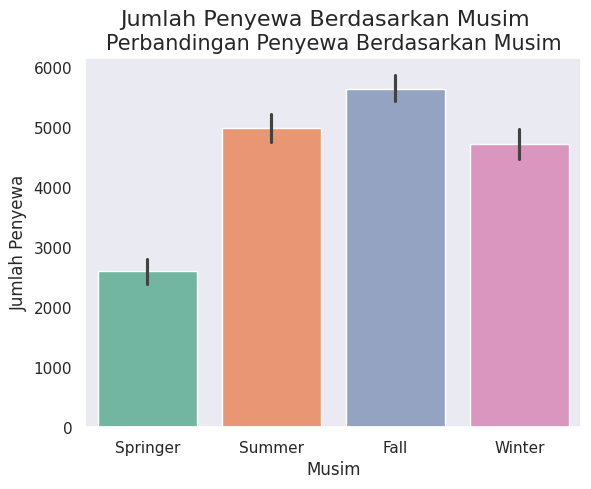

In [123]:
#Visualisasi penyewa sepeda berdasarkan "Season"
plt.suptitle("Jumlah Penyewa Berdasarkan Musim", fontsize=16)

sns.barplot(x='season', y='cnt', data=day, hue='season', palette="Set2")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.title("Perbandingan Penyewa Berdasarkan Musim", fontsize=15)
plt.show()

<Figure size 1200x1000 with 0 Axes>

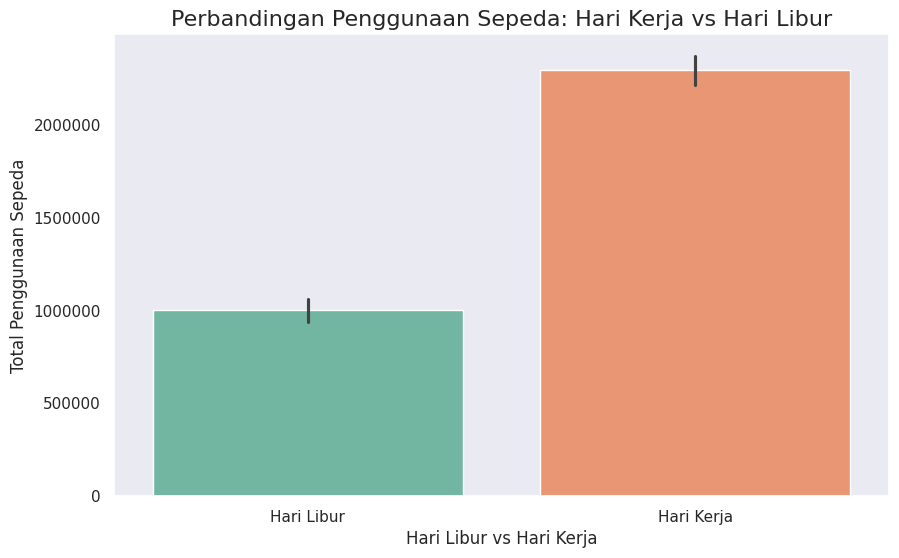

In [124]:
#Visualisasi penyewa sepeda berdasarkan "workingday"
fig = plt.figure(figsize=(12, 10))
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day, estimator=sum, palette='Set2')

plt.title('Perbandingan Penggunaan Sepeda: Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Hari Libur vs Hari Kerja', fontsize=12)
plt.ylabel('Total Penggunaan Sepeda', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#Conclusion



* Conclusion pertanyaan 1 (Bagaimana pengaruh musim terhadap peminjaman sepeda?)

Dari Visualisasi data, dapat dilihat bahwa musim berpengaruh pada jumlah peminjam sepeda. Jumlah peminjaman sepeda paling banyak pada Fall Season (musim gugur) disusul dengan Winter Season, Summer Season, Springer Season.

* Conclusion pertanyaan 2 (Bagaimana Jumlah penggunaan sepeda berdasarkan hari kerja dan hari libur?)

Dari visualisasi data tersebut dapat dilihat bahwa jumlah peminjaman sepeda lebih banyak saat hari kerja daripada hari libur.



In [125]:
day.to_csv('day_data.csv', index=False)